In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


# Loading data

In [2]:
prep_dataset1 = pd.read_csv('datasets/com_concept_drift/sdn_train_unormalized1.csv', delimiter=",")
# prep_dataset2 = pd.read_csv('datasets/com_concept_drift/sdn_train_unormalized2.csv', delimiter=",")
# prep_dataset3 = pd.read_csv('datasets/com_concept_drift/sdn_train_unormalized3.csv', delimiter=",")
test = pd.read_csv('datasets/com_concept_drift/sdn_test_unormalized.csv', delimiter=",")

prep_dataset1 = prep_dataset1[prep_dataset1.delay>0]
# prep_dataset2 = prep_dataset2[prep_datase2.delay>0]
# prep_dataset3 = prep_dataset3[prep_dataset3.delay>0]
test = test[test.delay>0]

In [3]:
prep_dataset1[prep_dataset1.delay<0]

,timestamp,seconds,temperature,label,delay


In [4]:
np.max(prep_dataset1.index)

35594

In [5]:
prep_dataset1.index = prep_dataset1['timestamp']
prep_dataset1.drop('timestamp', axis=1, inplace=True)

test.index = test['timestamp']
test.drop('timestamp', axis=1, inplace=True)

In [6]:
prep_dataset1 = prep_dataset1[prep_dataset1.delay>=0]
test = test[test.delay>=0]

prep_dataset1 = prep_dataset1[prep_dataset1.delay<=10000] 

test = test[test.delay<=10000]

In [7]:
max(test.delay)

1079.0

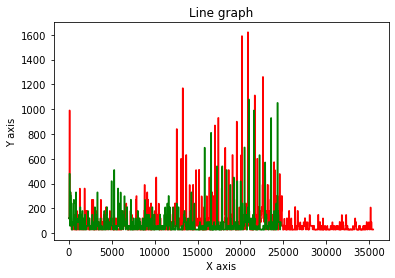

In [8]:
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(len(prep_dataset1.delay)), prep_dataset1.delay, color ="red")  
plt.plot(np.arange(len(test.delay)), test.delay, color ="green") 
plt.show()

Text(0.5, 1.0, 'Attribute: delay')

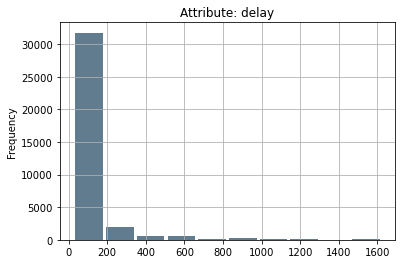

In [9]:
prep_dataset1["delay"].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title("Attribute: delay")

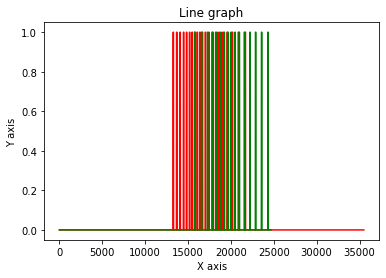

In [10]:
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(len(prep_dataset1.label)), prep_dataset1.label, color ="red")  
plt.plot(np.arange(len(test.label)), test.label, color ="green") 
plt.show()

# general graphic


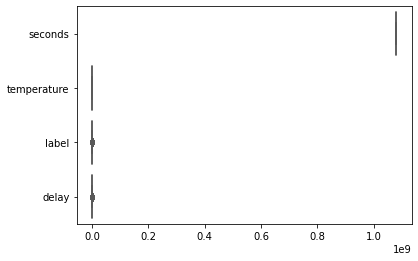

In [11]:
 ax = sns.boxplot(data=prep_dataset1, orient="h", palette="Set2")

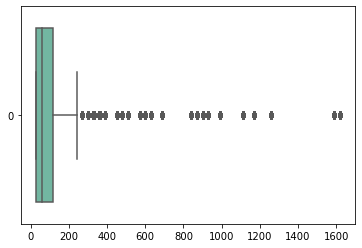

In [12]:
ax = sns.boxplot(data=prep_dataset1['delay'], orient="h", palette="Set2")

# Normalized Graphic 

In [13]:
from sklearn.preprocessing import StandardScaler

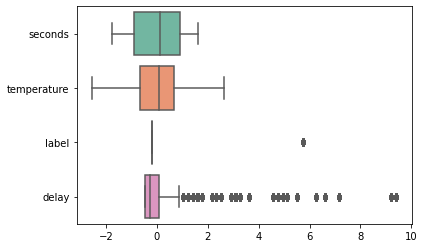

In [14]:
scaler = StandardScaler().fit(prep_dataset1)
norm_subset = pd.DataFrame(scaler.transform(prep_dataset1), columns = prep_dataset1.columns)
ax = sns.boxplot(data=norm_subset, orient="h", palette="Set2")

Text(0.5, 1.0, 'Attribute: delay')

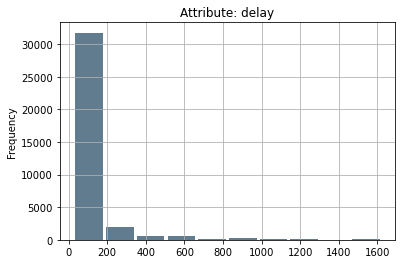

In [15]:
prep_dataset1["delay"].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title("Attribute: delay")

In [16]:
prep_dataset1.corr()

,seconds,temperature,label,delay
seconds,1.000000,0.181998,0.033296,-0.038983
temperature,0.181998,1.000000,0.036980,-0.012536
label,0.033296,0.036980,1.000000,0.630929
delay,-0.038983,-0.012536,0.630929,1.000000


In [17]:
prep_dataset1[prep_dataset1.delay<0]

,seconds,temperature,label,delay
timestamp,,,,


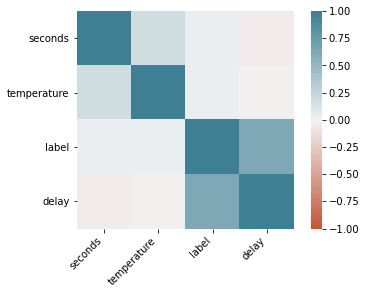

In [18]:
corr = prep_dataset1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [19]:
from sklearn.preprocessing import RobustScaler

In [20]:
f_columns = ['delay','temperature']

f_transformer = RobustScaler()
lb_transformer = RobustScaler()

f_transformer = f_transformer.fit(prep_dataset1[f_columns].to_numpy())
prep_dataset1.loc[:,f_columns] = f_transformer.transform(prep_dataset1[f_columns].to_numpy())

lb_transformer = lb_transformer.fit(prep_dataset1[['label']])
prep_dataset1['label'] = lb_transformer.transform(prep_dataset1[['label']])

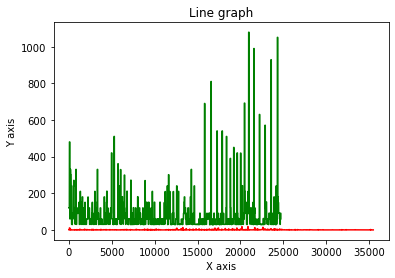

In [21]:
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(len(prep_dataset1.delay)), prep_dataset1.delay, color ="red")  
plt.plot(np.arange(len(test.delay)), test.delay, color ="green") 
plt.show()

In [22]:
np.argsort(prep_dataset1[prep_dataset1.label==1].iloc[:,8])

IndexError: single positional indexer is out-of-bounds

In [ ]:
prep_dataset1[prep_dataset1.label==1].iloc[0,8]